In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [98]:
d = pd.read_csv('../data/pier_2_eeg_1474063679.csv')
songs_w_eeg = pd.read_csv('../data/pier_2_songs_1474063679.csv')
songs_no_eeg = pd.read_csv('../data/pier_songs_no_eeg_1473740061.csv')

In [19]:
d.head()

,channel_0,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,time,tag
0,-1808272,967079,1117729,-4486044,1826111,1400799,227119,1266571,1.474064e+09,0
1,-1763590,1010559,1118343,-4482626,1839298,1401663,226993,1309400,1.474064e+09,0
2,-1878536,920033,1116259,-4506479,1755931,1406128,218871,1209748,1.474064e+09,0
3,-1949418,865611,1115246,-4514336,1730524,1405933,217830,1142274,1.474064e+09,0
4,-1854339,949907,1117108,-4493045,1808898,1401228,225647,1221754,1.474064e+09,0


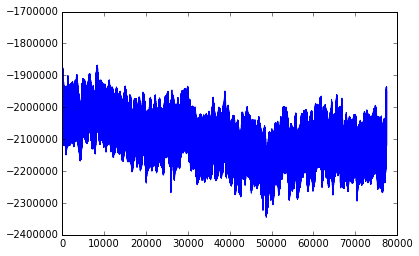

In [99]:
plt.plot(d.channel_0[:77500])

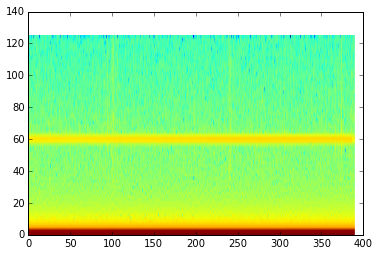

In [100]:
_ = plt.specgram(d.channel_2, NFFT=128, Fs=250, noverlap=64)
#FFT 128 transforms 

In [101]:
eeg = np.array(d.ix[:, 0:8])
eeg = eeg[250:77500,]

tag = np.array(d.ix[:, 'tag'])
tag = tag[250:]

In [54]:
from scipy import signal

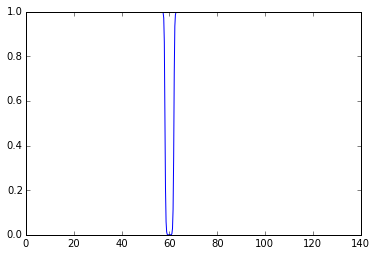

In [102]:
b, a = signal.butter(8, (4.0/125, 50.0/125), btype='bandpass') 
b, a
b2, a2 = signal.butter(8, (58.0/125, 62.0/125), btype='bandstop') 

f, x = signal.freqz(b2, a2)
plt.plot(f/np.pi*125, np.abs(x))

In [103]:
eeg_g = signal.lfilter(b2, a2, eeg, axis=0)
eeg_f = signal.lfilter(b, a, eeg_g, axis=0)

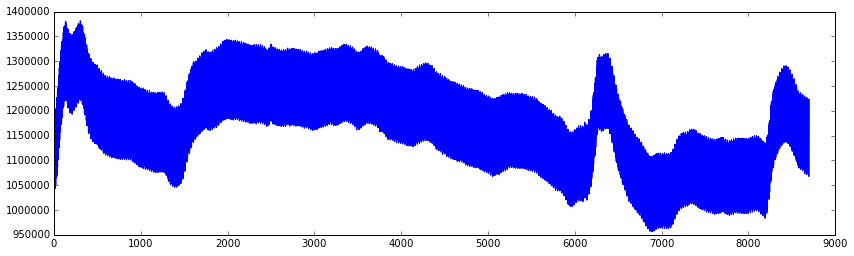

In [104]:
plt.figure(figsize=(14, 4))
plt.plot(eeg[800:9500, 7]) ## raw data

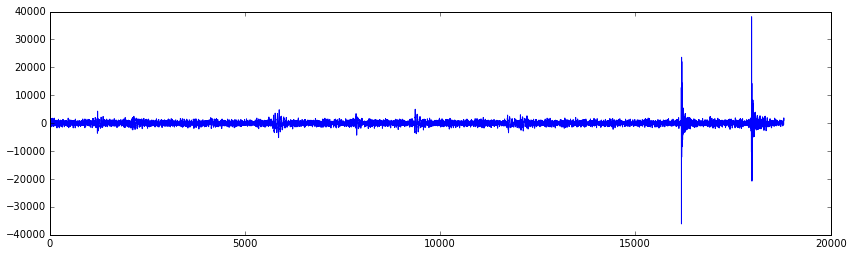

In [105]:
plt.figure(figsize=(14, 4))
plt.plot(eeg_f[1200:20000, 7])

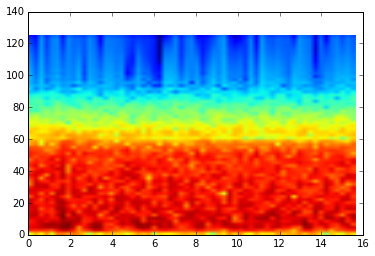

In [106]:
_ = plt.specgram(eeg_f[2000:6000,0], NFFT=128, Fs=250, noverlap=64)